In [2]:
import numpy as np
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import parse_records as pr
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [3]:
c_labels = np.array([i for i in range(0,10)])
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    plt.figure(figsize=(10, 10))  #in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom'
                )

    plt.savefig(filename)

In [4]:
import tensorflow as tf
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
mnist.test.labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Attempt to project just 1 image

In [6]:
weights = pr.parse_all("weights_format.txt")[0]

In [43]:
np.array(weights).shape

(100, 10)

In [7]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
lowDWeights = tsne.fit_transform(weights)

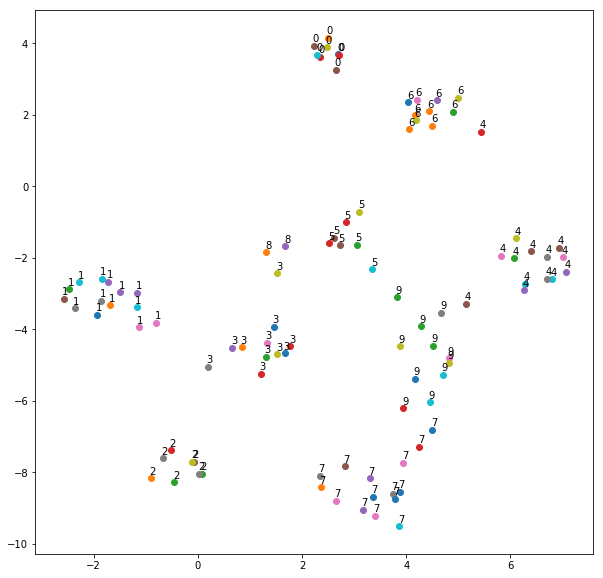

In [8]:
plot_with_labels(lowDWeights,mnist.test.labels[:100] )

# Project all images across epochs

In [7]:
all_weights = pr.parse_all("weights_format.txt")

In [10]:
np.array(all_weights).shape

(7, 100, 10)

In [11]:
epoch_weights = []

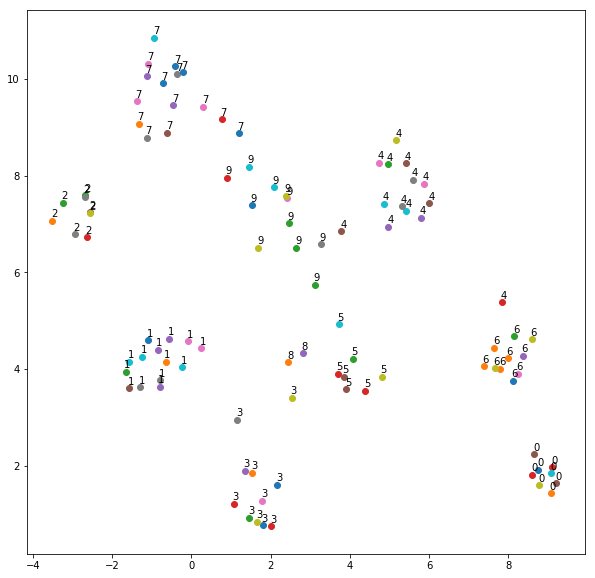

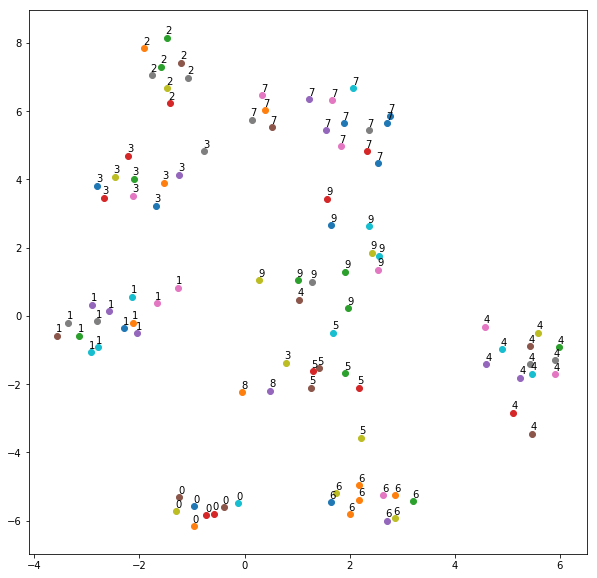

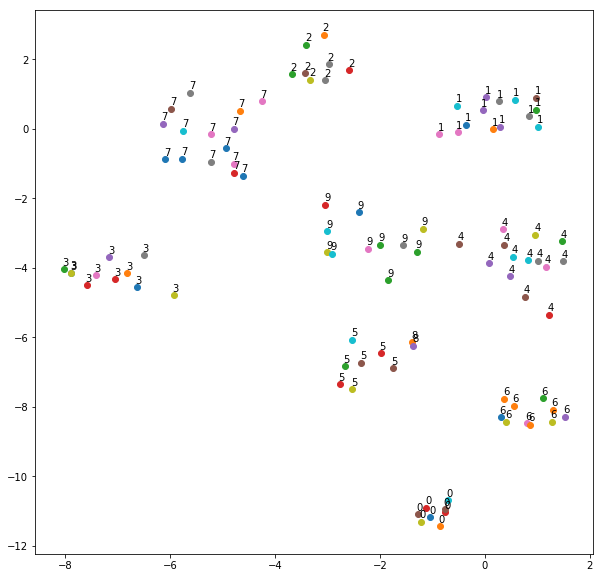

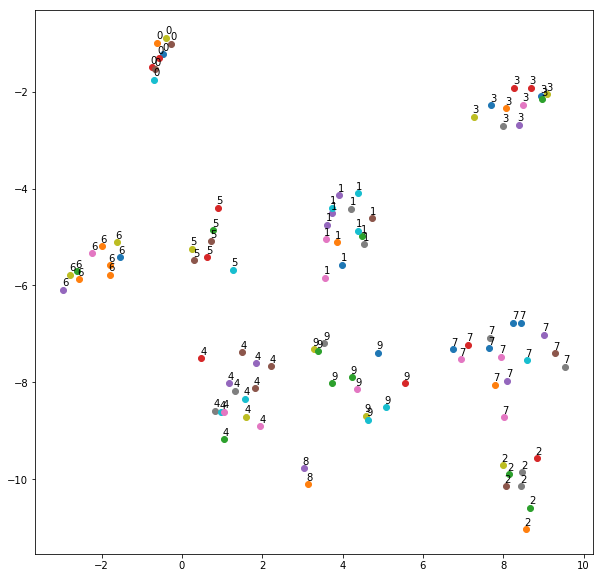

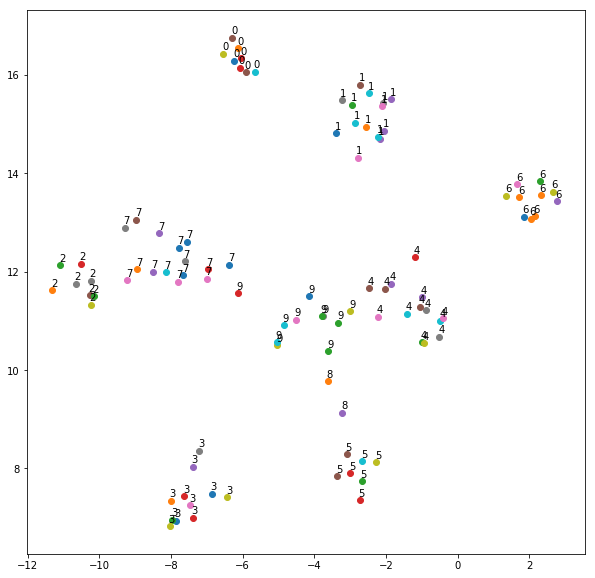

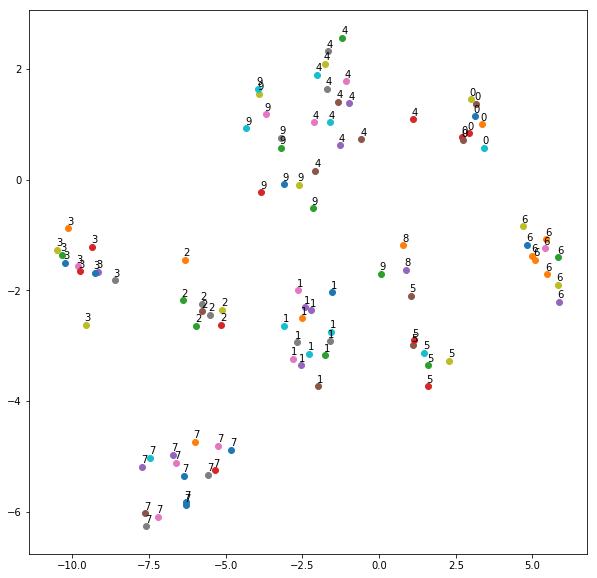

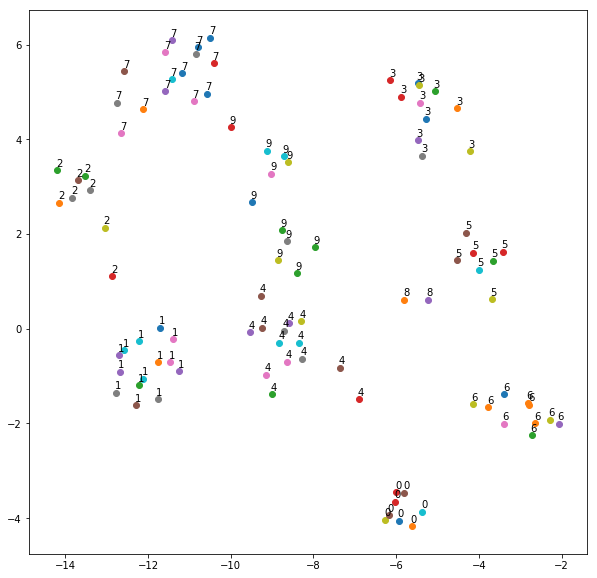

In [12]:
i=0
for w in all_weights:
    tsne = TSNE(perplexity=30, n_components=2, init="pca", n_iter=5000)
    lowDWeights = tsne.fit_transform(w)
    epoch_weights.append(lowDWeights)
    plot_with_labels(lowDWeights, mnist.test.labels[:100], "epoch"+str(i))
    i+=1

In [13]:
#given a list of points, generates a matrix of distances 
def calc_distances(pts_lst): 
    dist_matrix = []
    for i in pts_lst: 
        pts = list(map(lambda x: np.linalg.norm(i-x), pts_lst))
        dist_matrix.append(pts)
    return np.array(dist_matrix)

In [14]:
distances = calc_distances(epoch_weights[0])

In [15]:
def kth_distances(pt_lst,k):
    sorted = np.sort(pt_lst)[1:k+1]
    pts = []
    for i in sorted: 
        pt_index = np.nonzero(pt_lst==i)
        if(len(pt_index)>1): raise Exception("same distances")
        else: pt_index = pt_index[0][0]
        pts.append({"pt":pt_index,"dist":i, "class":mnist.test.labels[pt_index]})
    return pts

In [16]:
print(mnist.test.labels[0])
pts_dict= kth_distances(distances[0], 6)

7


In [17]:
def pt_ratio(nearest, i_label):
    s = 0.0
    for i in nearest: 
        if i["class"]==i_label: s+=1
    return s / len(nearest)

def n_ratio(projs, k):
    distances = calc_distances(projs)#matrix of distances
    sum_ratios = 0.0
    for i in range(len(distances)): 
        nearest = kth_distances(distances[i], k)
        i_label = mnist.test.labels[i]
        sum_ratios += pt_ratio(nearest, i_label)
    return sum_ratios / len(distances)

In [18]:
n_ratio(epoch_weights[0],6)

0.9266666666666667

In [27]:
epoch_weights[0].shape

(100, 2)

In [41]:
for i in range(len(epoch_weights)):
    avg = 0
    for j in range(1,7):
        avg += n_ratio(epoch_weights[i],j)
    print("epoch"+str(i) + ": " +str(avg/6))

epoch0: 0.9370833333333334
epoch1: 0.928138888888889
epoch2: 0.969861111111111
epoch3: 0.9831666666666666
epoch4: 0.9609722222222222
epoch5: 0.9500000000000001
epoch6: 0.968


In [30]:
np.save("epoch_weights", epoch_weights)